In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.ticker as ticker
import numpy as np

In [66]:
사육비 = pd.read_excel('육우_두당_사육비_2008_2023_통계청.xlsx')
사육비

,비목별,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,비목별,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균 (원)
1,비용합계,4034510,4305638,4324629,4812738,4895593,4752599,4606343,4580671,4493296,4802797,4995562,5118632,5362850,5666117,6177623,6211158
2,가축비,565535,445401,455460,431421,460657,311323,300822,472936,559246,526477,632795,746450,848523,1022505,779585,455744
3,사료비,2380471,2661585,2477290,2774360,2874190,2909513,2836632,2717761,2514845,2542519,2656056,2686411,2795241,2960578,3537031,3572594
4,농후사료,1974832,2162811,1923383,2242992,2276916,2360001,2254714,2209304,2074647,2092456,2171388,2146277,2232942,2389793,2813786,2770440
5,조사료,249335,281610,292526,335836,303934,338544,305945,272596,288970,284635,346696,368857,362707,370215,456467,537115
6,TMR사료,156304,217164,261380,195532,293340,210968,275973,235861,151228,165428,137972,171277,199592,200570,266778,265039
7,수도광열비,35761,34893,39374,49535,47612,43823,55807,54231,63710,84983,85569,85734,82420,82020,112844,150888
8,방역치료비,36497,30243,38275,40859,39944,30208,35059,33922,31293,39229,40016,40637,46724,41333,46176,45431
9,자동차비,-,-,-,-,-,-,25983,31743,35759,30882,38713,40403,43342,45861,48566,73980


In [67]:
사육비.drop(range(0,3), inplace=True)
사육비.drop(range(4,37), inplace=True)
사육비=사육비.T
사육비.insert(0, 'Index', 사육비.index)
사육비.reset_index(drop=True, inplace=True)
사육비.columns = 사육비.loc[0]
사육비.drop(0, inplace=True)
사육비.columns=['년', '농가의 동물용 사료 구매비']
사육비.reset_index(drop=True, inplace=True)
사육비 = 사육비.astype({'년': int, '농가의 동물용 사료 구매비': int})
사육비

,년,농가의 동물용 사료 구매비
0,2008,2380471
1,2009,2661585
2,2010,2477290
3,2011,2774360
4,2012,2874190
5,2013,2909513
6,2014,2836632
7,2015,2717761
8,2016,2514845
9,2017,2542519


In [68]:
사료원료비용 = pd.read_excel('식품제조업(10인 이상)(주요생산비)(2007~2022).xlsx')
사료원료비용

,"식품제조업(10인 이상)(출하액,주요생산비,부가가치)(2007~2022)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,단위 : 백만원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,산업별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,NaN,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비
3,□ 동물용 사료 및 조제식품 제조업,4227292,5969008,6458254,0,7137402,8763148,9041802,8327012,8086562,7620264,7335684,7467729,8074830,8009505,9795658,13030862
4,- 배합 사료 제조업,4146445,5853858,6355034,0,7020087,8513082,8643909,7944998,7712861,7220835,6975547,7023351,7567183,7562258,9228408,12374245
5,- 단미사료 및 기타 사료 제조업,80847,115150,103220,0,117315,250066,397893,382014,373701,399429,360137,444378,507647,447247,567250,656617


In [69]:
사료원료비용.drop(0, inplace=True)
사료원료비용.columns = 사료원료비용.loc[1]
사료원료비용.drop(range(1,3), inplace=True)
사료원료비용.drop(range(4,6), inplace=True)
사료원료비용=사료원료비용.T
사료원료비용.insert(0, 'Index', 사료원료비용.index)
사료원료비용.reset_index(drop=True, inplace=True)
사료원료비용.columns = 사료원료비용.loc[0]
사료원료비용.drop(0, inplace=True)
사료원료비용.columns=['년', '동물용 사료 주요생산비']
사료원료비용.reset_index(drop=True, inplace=True)
사료원료비용 = 사료원료비용.astype({'년': int, '동물용 사료 주요생산비': int})
사료원료비용.replace(0, np.nan, inplace=True)
사료원료비용_interpolated = 사료원료비용.interpolate(method='linear')
사료원료비용_interpolated

,년,동물용 사료 주요생산비
0,2007,4227292.0
1,2008,5969008.0
2,2009,6458254.0
3,2010,6797828.0
4,2011,7137402.0
5,2012,8763148.0
6,2013,9041802.0
7,2014,8327012.0
8,2015,8086562.0
9,2016,7620264.0


In [70]:
feeding_cost_raw_material = pd.merge(사육비, 사료원료비용_interpolated, on='년', how='inner')
feeding_cost_raw_material

,년,농가의 동물용 사료 구매비,동물용 사료 주요생산비
0,2008,2380471,5969008.0
1,2009,2661585,6458254.0
2,2010,2477290,6797828.0
3,2011,2774360,7137402.0
4,2012,2874190,8763148.0
5,2013,2909513,9041802.0
6,2014,2836632,8327012.0
7,2015,2717761,8086562.0
8,2016,2514845,7620264.0
9,2017,2542519,7335684.0


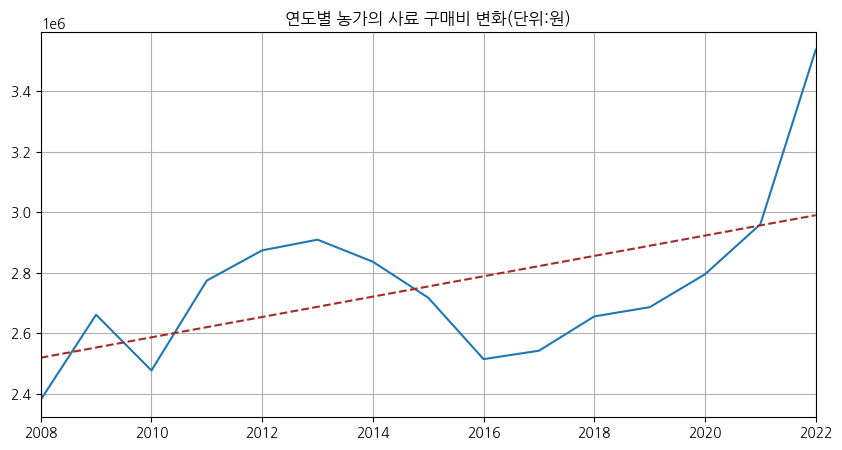

In [71]:
plt.figure(figsize=(10,5))
plt.plot(feeding_cost_raw_material['년'], feeding_cost_raw_material['농가의 동물용 사료 구매비'])

z = np.polyfit(feeding_cost_raw_material['년'], feeding_cost_raw_material['농가의 동물용 사료 구매비'], 1)
p = np.poly1d(z)
plt.plot(feeding_cost_raw_material['년'], p(feeding_cost_raw_material['년']), '--', color='brown')

plt.title('연도별 농가의 사료 구매비 변화(단위:원)')
plt.xlim(2008,2022)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid()
plt.show()

In [72]:
feeding_cost_raw_material.corr()

,년,농가의 동물용 사료 구매비,동물용 사료 주요생산비
년,1.000000,0.550457,0.676420
농가의 동물용 사료 구매비,0.550457,1.000000,0.944677
동물용 사료 주요생산비,0.676420,0.944677,1.000000
